# Grupo

| RA | Nome |
| :---------------- | :------: |
| 200109 | Leonardo Dimarchi Souza da Cruz |
| 200359 | Luiz Fernando Toquetto |
| 224072 | Vinícius Martins Granso |

# Dataset

O dataset escolhido foi o [Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009). Ele possui informações de variáveis físico-químicas (são as entradas) e dados sensoriais (sáida).

In [267]:
import pandas as pd

# Lendo o dataset
dataset_original = pd.read_csv('winequality-red.csv')

# Análise Exploratória de Dados (EDA)

### Análise dos atributos

In [268]:
# Exibindo as 5 primeiras linhas do dataset
display(dataset_original.head())

# Exibindo algumas estatísticas dos atributos
dataset_original.describe()

# Exibindo algumas informações dos atributos
dataset_original.info()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Com a visualização do dataset, podemos entender o que cada atributo significa, com a ajuda do fórum de discussões do Kaggle para as colunas menos intuitivas.

Variáveis ​​de entrada (com base em testes físico-químicos):

- **fixed acidity**: float
- **volatile acidity**: float
- **citric acid**: float
- **residual sugar**: float
- **chlorides**: float
- **free sulfur dioxide**: float
- **total sulfur dioxide**: float
- **density**: float
- **pH**: float
- **sulphates**: float
- **alcohol**: float

Variável de saída (com base em dados sensoriais)

- **quality**: integer

### Verificação de valores ausentes 

In [269]:
soma_de_nulos_por_atributo = dataset_original.isnull().sum();
print(soma_de_nulos_por_atributo)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Não existem valores nulos em nenhum dos atributos deste dataset.


# Pré-processamento

### Correlação

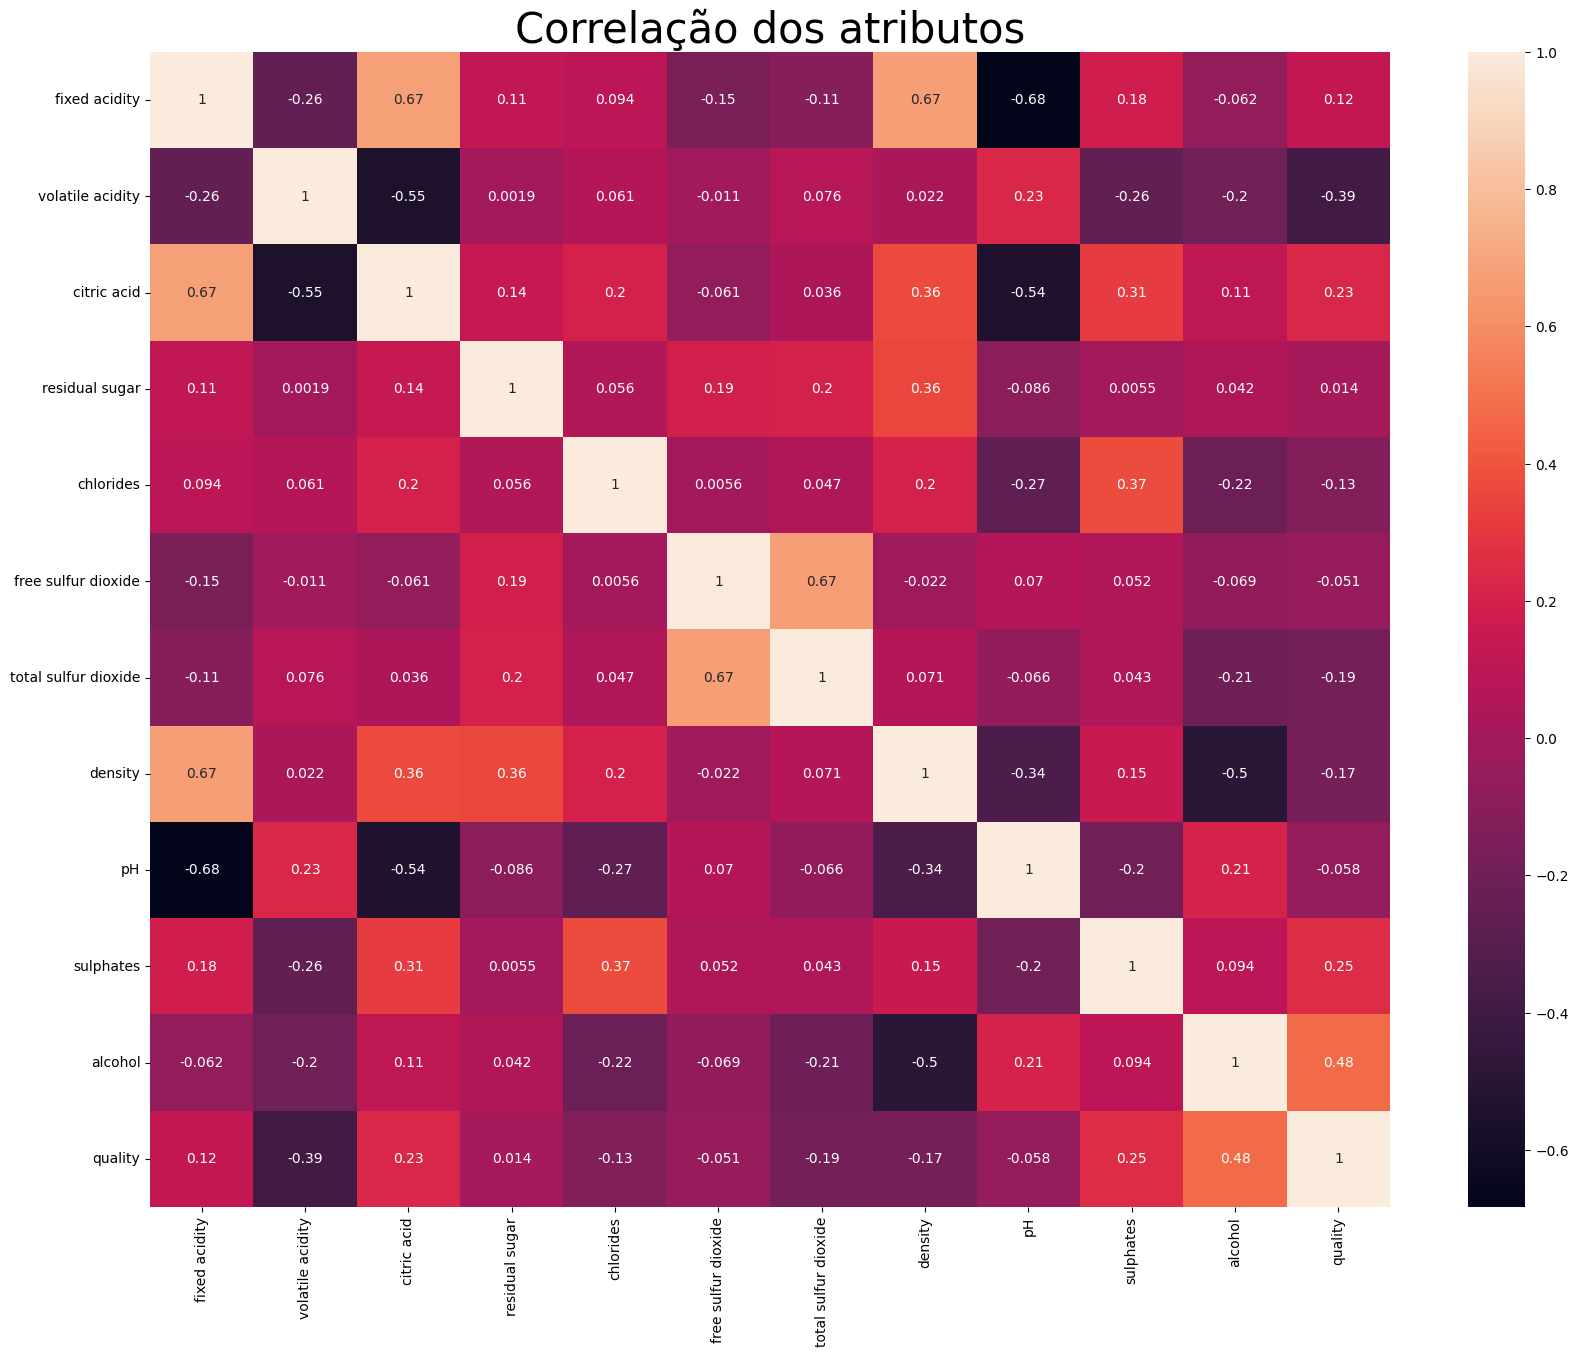

In [270]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Realizando a cópia do dataset para manter a cópia original 
dataset = dataset_original.copy()

# Calculando o mapa de correlação
mapa_de_correlacao = dataset.corr()

# Plotando o mapa de correlação
plt.figure(figsize=(20,15))
sns.heatmap(mapa_de_correlacao, annot=True)
plt.title("Correlação dos atributos",fontsize=30)
plt.show()


Plotamos o heatmap da correlação dos atributos para identificar quais são mais relevantes para determinar a quailidade do vinho. 

- As colunas **alcohol** e **sulphates** são as colunas que se correlacionam melhor com a qualidade do vinho.

### Remoção de atributos

In [271]:
# Removendo os atributos 
dataset_pos_remocao_colunas = dataset.drop(['residual sugar', 'free sulfur dioxide', 'pH'], axis=1)

# Exibindo as dimensões do dataset
print(dataset_pos_remocao_colunas.shape)

(1599, 9)


Dado a análise das informações apresentadas até o momento, removeremos os atributos **residual sugar**, **free sulfur dioxide** e **pH** por conta de seus valores terem pouca influência sobre o atributo **qualidade**.

### Outliers


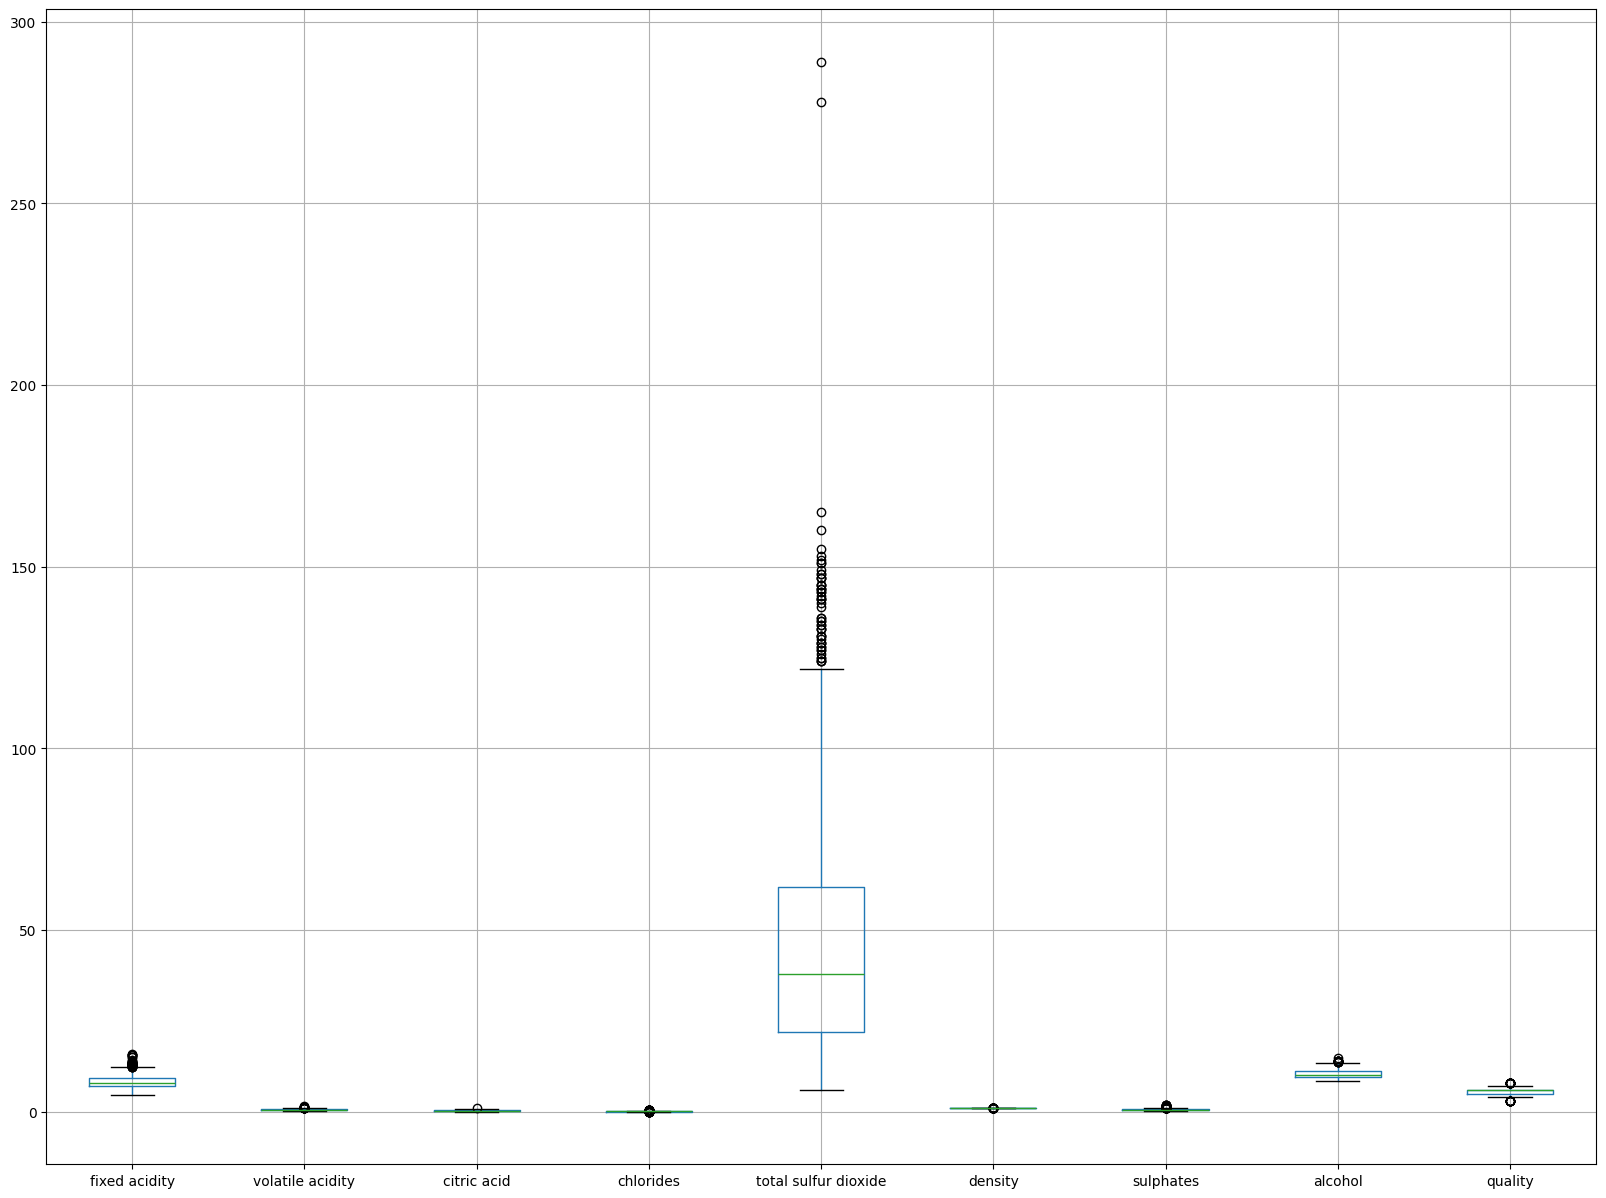

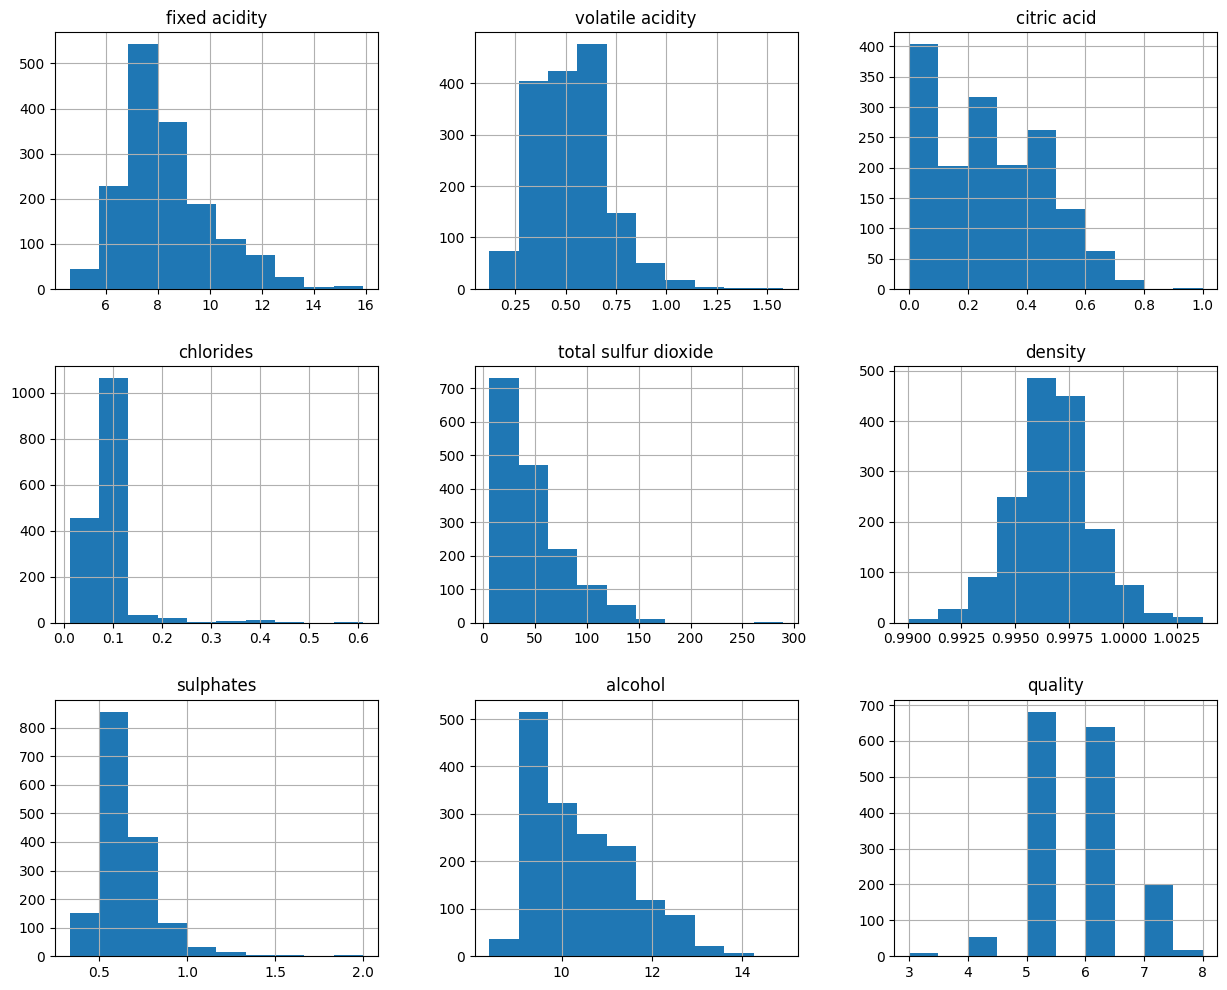

In [272]:
dataset_pos_remocao_colunas.boxplot(figsize=(20,15))
dataset_pos_remocao_colunas.hist(bins=10,figsize=(15,12))
plt.show()

### Tratamento de desequilíbrio de classes

Verificar o que podemos fazer

### Separação dos dados de treino/teste

In [273]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def quality(x):
    if x < 5:
        return 0 # Ruim
    elif x == 5 or x == 6:
        return 1 # Medio
    else:
        return 2 # Bom
    
dataset_pos_remocao_colunas['quality'] = dataset_pos_remocao_colunas['quality'].apply(quality)

X = dataset_pos_remocao_colunas.drop(['quality'], axis=1)
y = dataset_pos_remocao_colunas['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelos 

### Naive Bayes

In [274]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Acurácia: {accuracy:.2f}')

Acurácia: 0.77


### KNN

In [275]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)

pred = knn.predict(X_test)

accuracy = accuracy_score(y_test,pred)

print(f'Acurácia: {accuracy:.2f}')

Acurácia: 0.84


### Redes neurais

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4


,0,1,2
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_21 (Normaliz  (None, 8)                 17        
 ation)                                                          
                                                                 
 dense_36 (Dense)            (None, 12)                108       
                                                                 
 dense_37 (Dense)            (None, 3)                 39        
                                                                 
Total params: 164 (660.00 Byte)
Trainable params: 147 (588.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________
15/15 [==============================] - 0s 4ms/step
['loss', 'accuracy']
[0.40756168961524963, 0.8333333134651184]


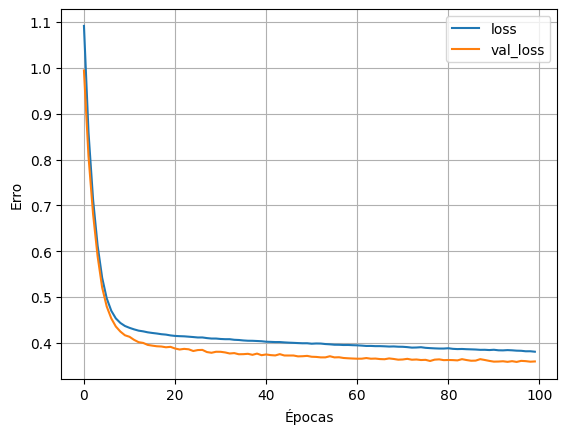

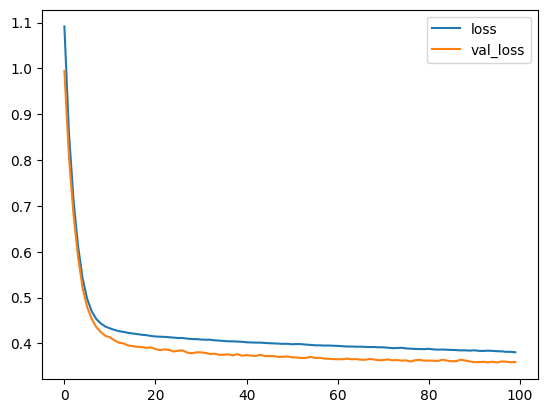

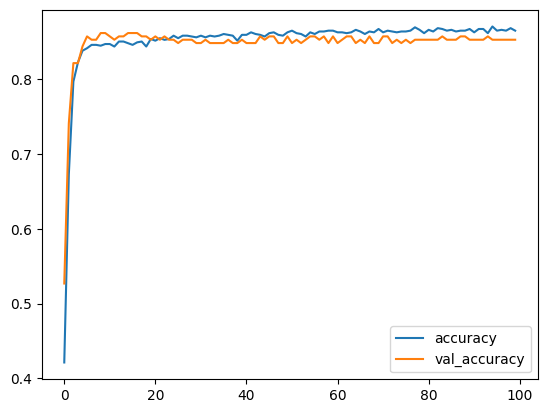

In [276]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.metrics import accuracy_score

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)

def plot_acc(history):
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid(True)

X = dataset_pos_remocao_colunas.drop(['quality'], axis=1)
y = pd.get_dummies(dataset_pos_remocao_colunas['quality'], columns=['quality'])

display(X.head())
display(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

normalizer = preprocessing.Normalization()
normalizer.adapt(X_train)

model = keras.Sequential([
    normalizer,
    layers.Dense(12, activation='tanh'),
    layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split = 0.2,
    batch_size=12,
    verbose=0
)

plot_loss(history)

y_pred = model.predict(X_test).reshape(-1)

losses = pd.DataFrame(history.history)

losses[['loss','val_loss']].plot()
losses[['accuracy','val_accuracy']].plot()

print(model.metrics_names)
print(model.evaluate(X_test, y_test, verbose=0))

# Conclusões sobre os modelos

A preencher